In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

In [4]:
# 데이터셋 로드
emotion_dataset = load_dataset("dair-ai/emotion")

# 데이터프레임으로 변환
df_train = pd.DataFrame(emotion_dataset['train'])
df_validation = pd.DataFrame(emotion_dataset['validation'])
df_test = pd.DataFrame(emotion_dataset['test'])

# 데이터셋 합치기
df = pd.concat([df_train, df_validation, df_test])

# 감정 레이블
emotion_labels = ["sadness", "joy", "anger", "fear", "love", "surprise"]

c:\Python311\Lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


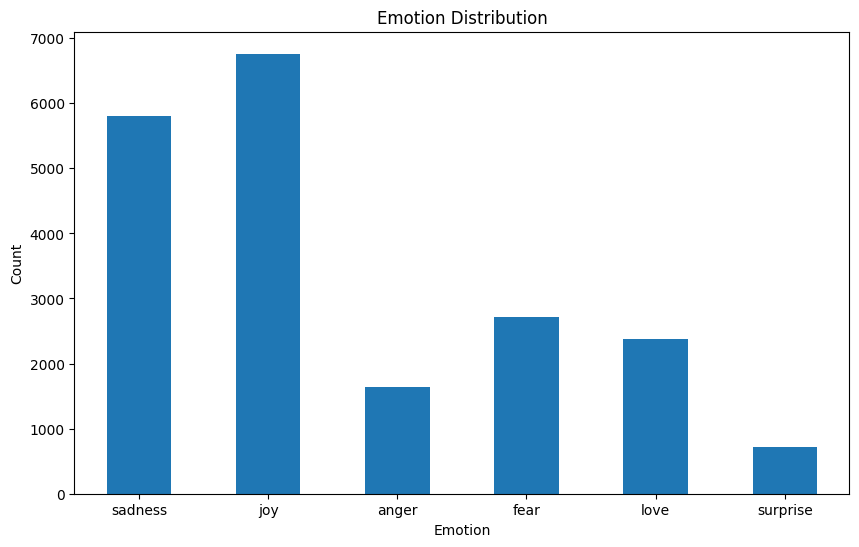

In [4]:
# 각 감정의 분포 시각화
plt.figure(figsize=(10, 6))
df['label'].value_counts().sort_index().plot(kind='bar')
plt.xticks(ticks=range(len(emotion_labels)), labels=emotion_labels, rotation=0)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution')
plt.show()

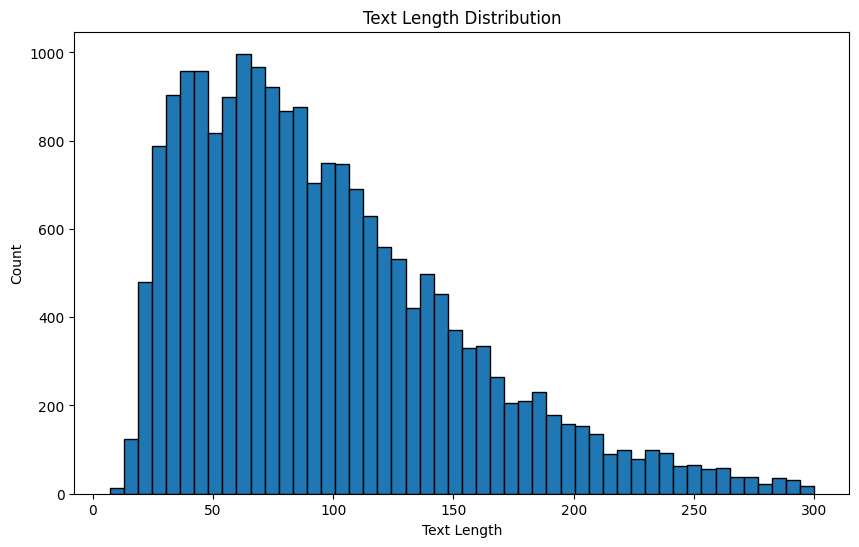

In [5]:
# 문장 길이 분포 시각화
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
df['text_length'].plot(kind='hist', bins=50, edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Text Length Distribution')
plt.show()

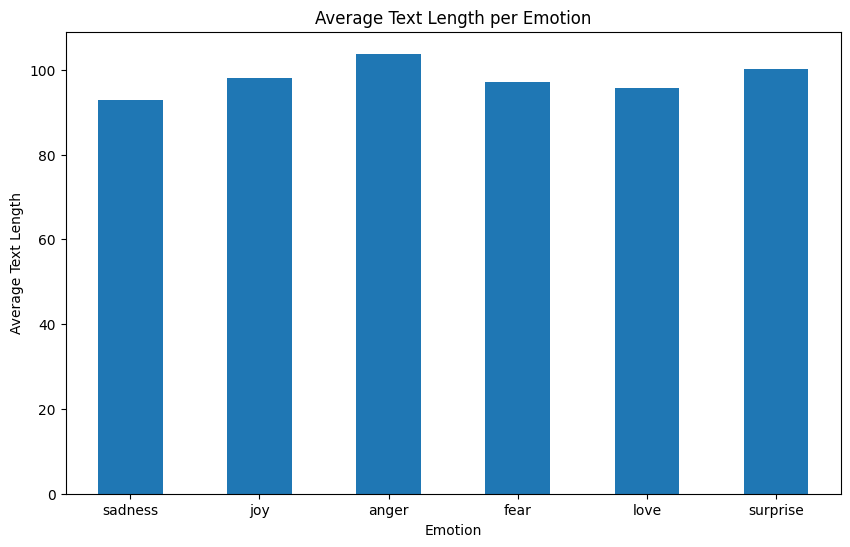

In [6]:
# 각 감정별 평균 문장 길이
emotion_text_length = df.groupby('label')['text_length'].mean()
plt.figure(figsize=(10, 6))
emotion_text_length.plot(kind='bar')
plt.xticks(ticks=range(len(emotion_labels)), labels=emotion_labels, rotation=0)
plt.xlabel('Emotion')
plt.ylabel('Average Text Length')
plt.title('Average Text Length per Emotion')
plt.show()

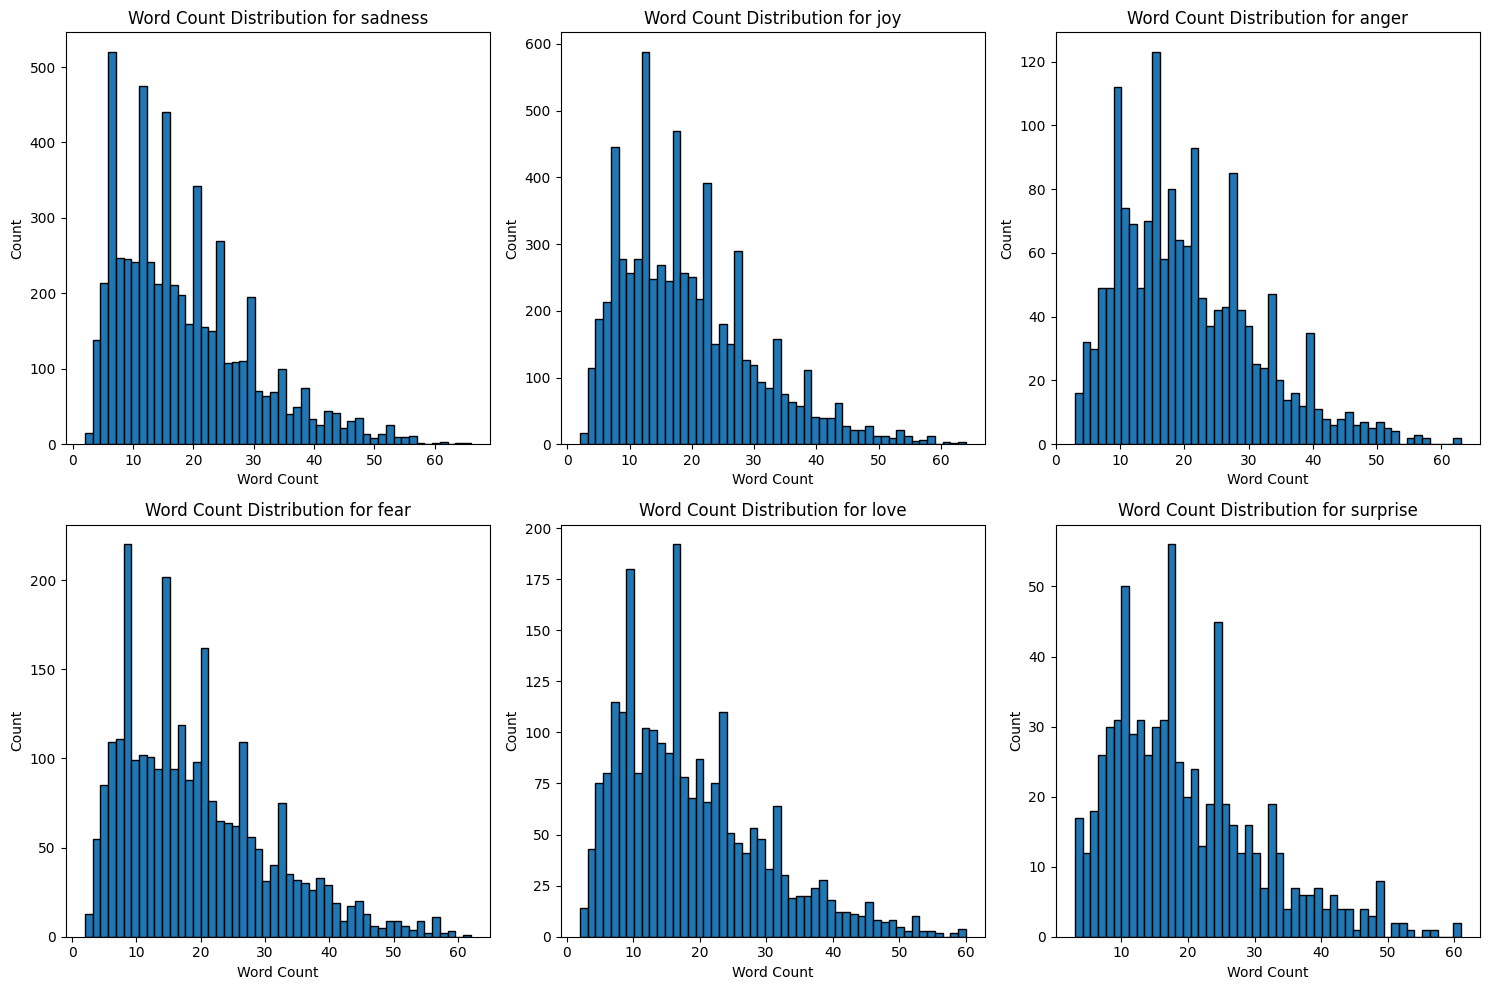

In [9]:
# 감정별 단어 수 계산
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# 감정별 히스토그램 시각화
emotion_labels = ['sadness', 'joy', 'anger', 'fear', 'love', 'surprise']

plt.figure(figsize=(15, 10))

for i, label in enumerate(emotion_labels):
    plt.subplot(2, 3, i+1)
    subset = df[df['label'] == i]
    subset['word_count'].plot(kind='hist', bins=50, edgecolor='black')
    plt.title(f'Word Count Distribution for {label}')
    plt.xlabel('Word Count')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


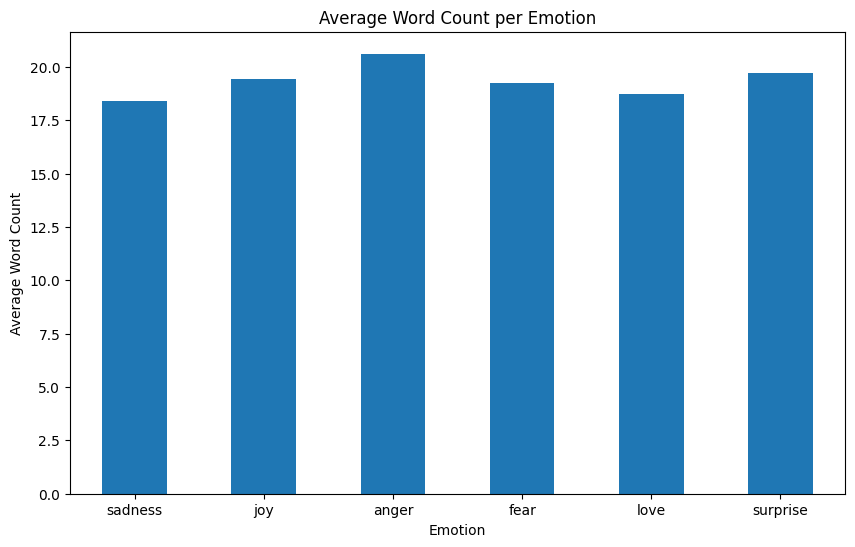

In [8]:
# 각 감정별 평균 단어 수
emotion_word_count = df.groupby('label')['word_count'].mean()
plt.figure(figsize=(10, 6))
emotion_word_count.plot(kind='bar')
plt.xticks(ticks=range(len(emotion_labels)), labels=emotion_labels, rotation=0)
plt.xlabel('Emotion')
plt.ylabel('Average Word Count')
plt.title('Average Word Count per Emotion')
plt.show()

In [11]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB 9.2 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.5 MB 6.7 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.5 MB 5.6 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.5 MB 4.9 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.5 MB 4.6 MB/s eta 0:00:01
   ------------------------------------- -- 1.4/1.5 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------------------------------- 97.9/97.9 kB 5.5 MB/s eta 0:00:00


In [13]:
import nltk

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\장건호\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

c:\Python311\Lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


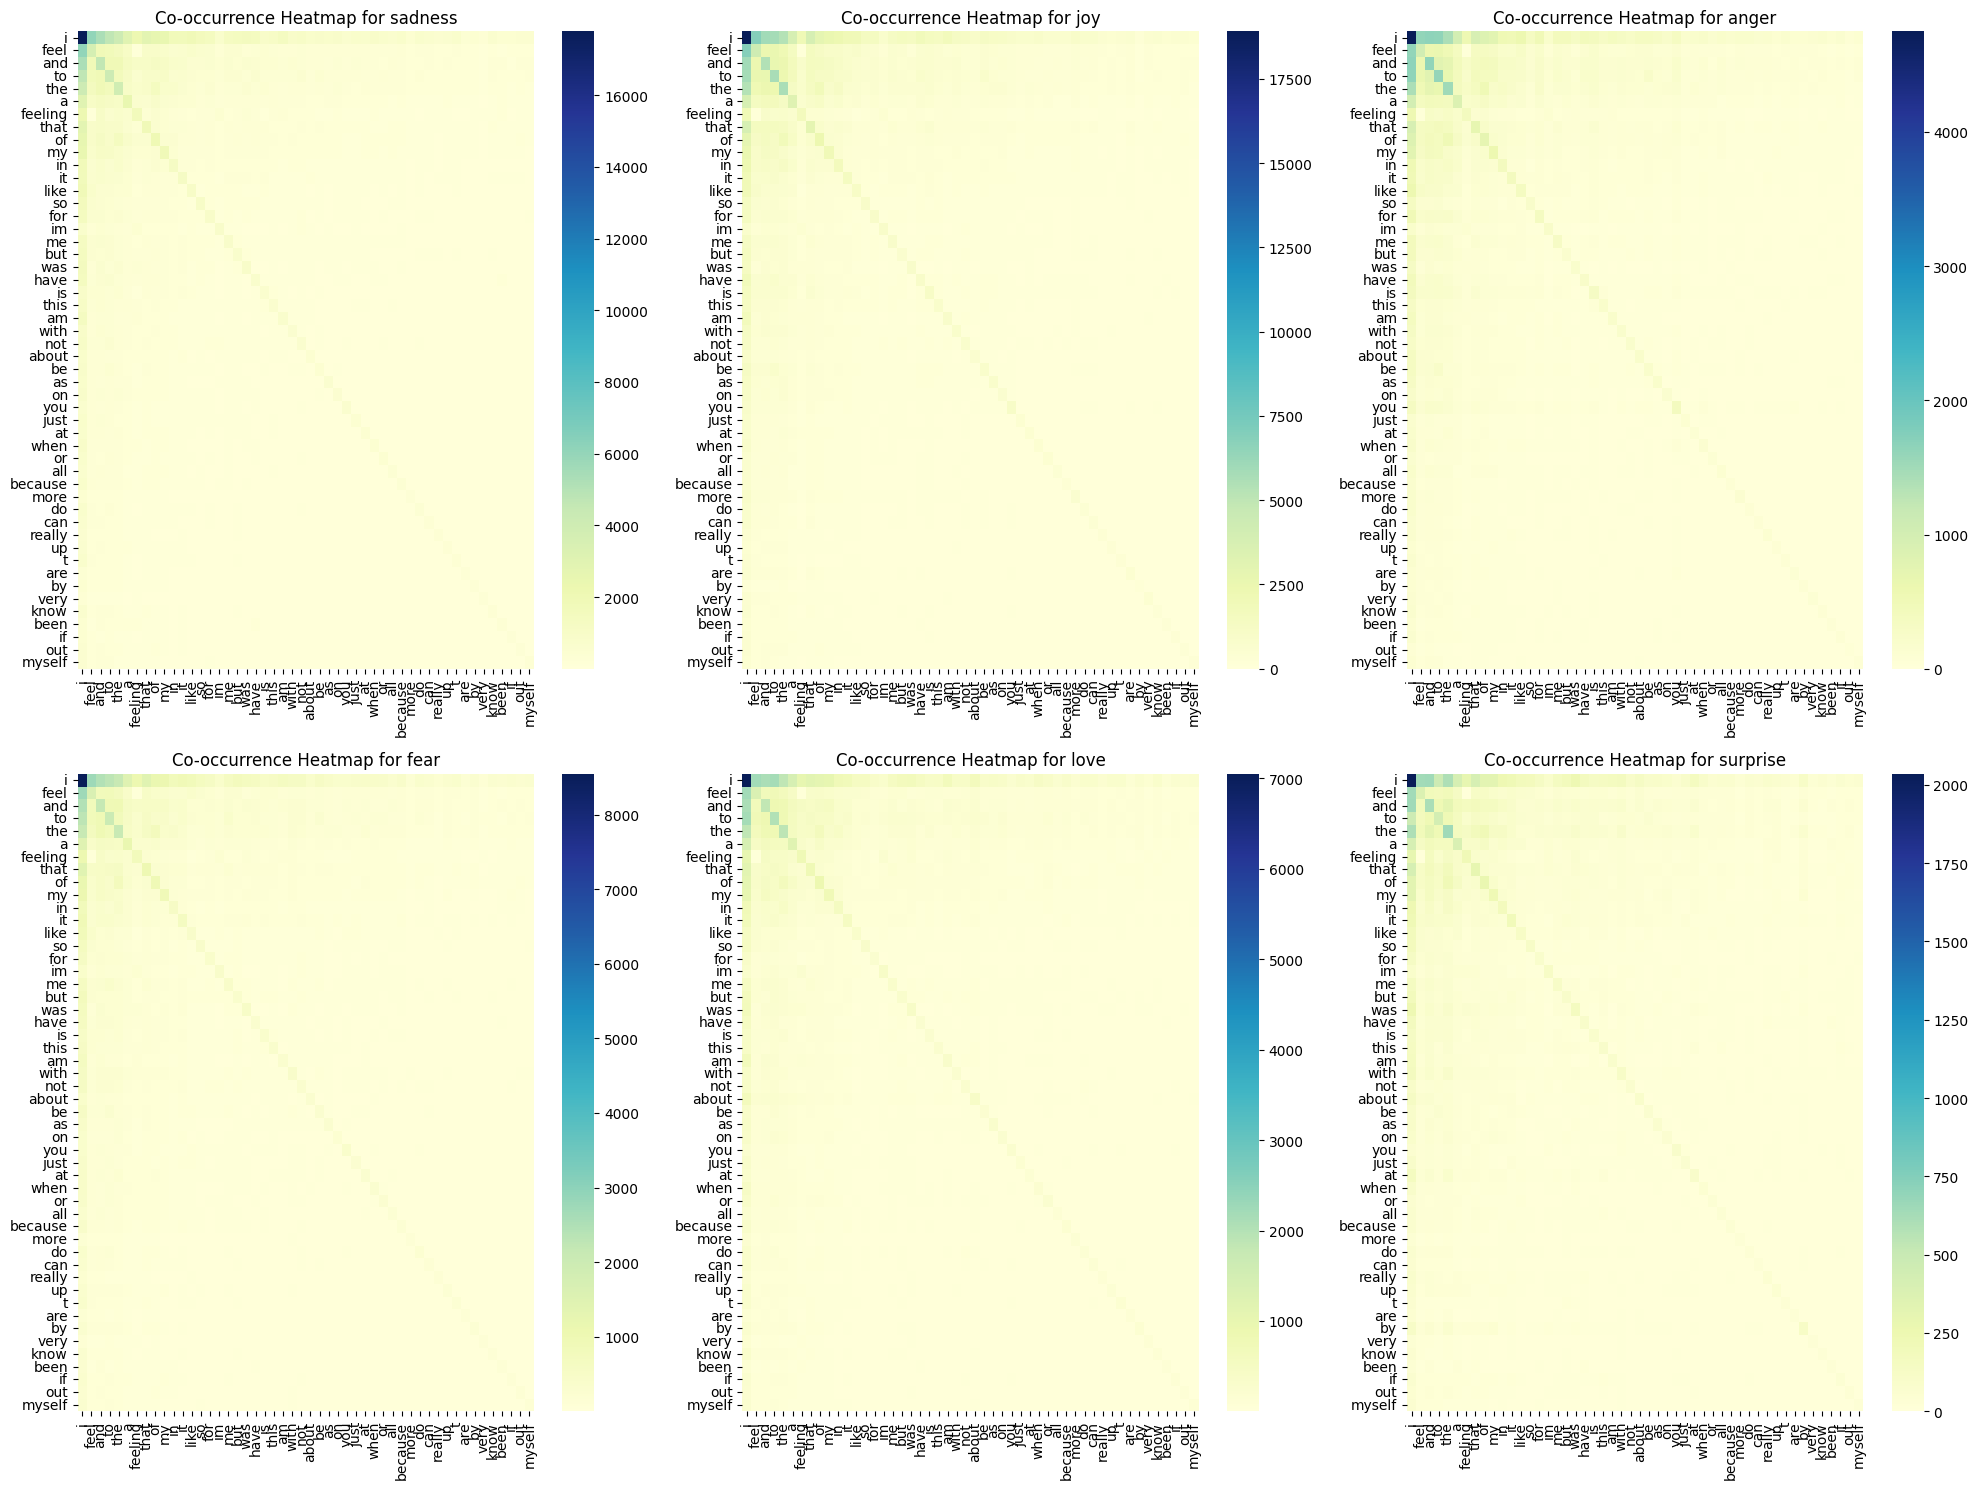

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from collections import Counter
from datasets import load_dataset

# 데이터셋 로드
emotion_dataset = load_dataset("dair-ai/emotion")
df = pd.DataFrame(emotion_dataset['train'])

# 감정 라벨 정의
emotion_labels = ['sadness', 'joy', 'anger', 'fear', 'love', 'surprise']
df['emotion'] = df['label'].apply(lambda x: emotion_labels[x])

# 텍스트 데이터 전처리 및 토큰화
df['tokens'] = df['text'].apply(word_tokenize)

# 감정별 단어 공출현 행렬 생성
def compute_co_occurrence(tokens, vocab):
    co_occurrence = np.zeros((len(vocab), len(vocab)))
    for token_list in tokens:
        for i, token1 in enumerate(token_list):
            if token1 in vocab:
                index1 = vocab.index(token1)
                for j, token2 in enumerate(token_list):
                    if token2 in vocab:
                        index2 = vocab.index(token2)
                        co_occurrence[index1][index2] += 1
    return co_occurrence

# 단어 빈도 계산 및 상위 N개 단어 선택
N = 50
all_tokens = [token for sublist in df['tokens'].tolist() for token in sublist]
vocab = [word for word, count in Counter(all_tokens).most_common(N)]

# 감정별 공출현 행렬 계산 및 시각화
plt.figure(figsize=(20, 15))

for i, emotion in enumerate(emotion_labels):
    plt.subplot(2, 3, i+1)
    emotion_tokens = df[df['emotion'] == emotion]['tokens'].tolist()
    co_occurrence_matrix = compute_co_occurrence(emotion_tokens, vocab)
    sns.heatmap(co_occurrence_matrix, xticklabels=vocab, yticklabels=vocab, cmap="YlGnBu")
    plt.title(f'Co-occurrence Heatmap for {emotion}')

plt.tight_layout()
plt.show()


c:\Python311\Lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


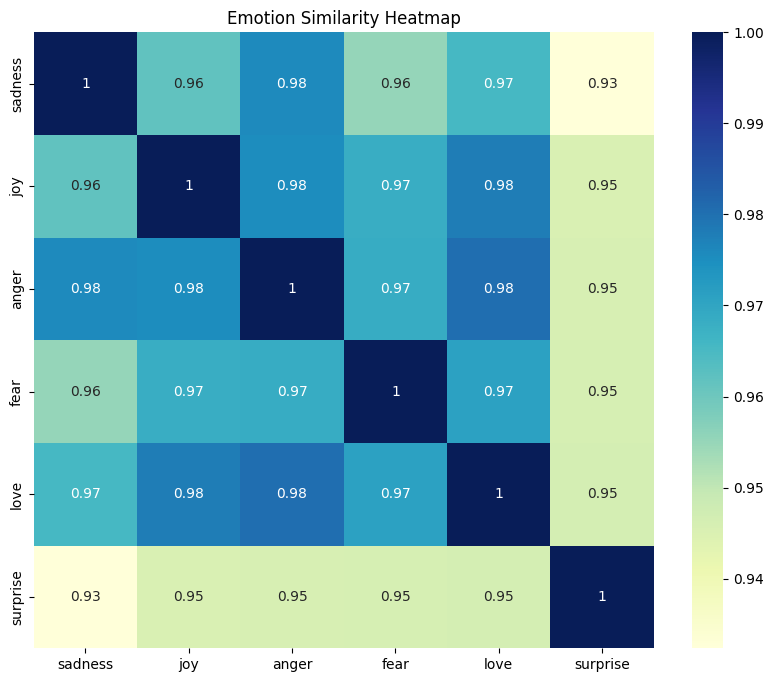

In [6]:
import pandas as pd
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 로드
emotion_dataset = load_dataset("dair-ai/emotion")
df = pd.DataFrame(emotion_dataset['train'])

# 감정 라벨 정의
emotion_labels = ['sadness', 'joy', 'anger', 'fear', 'love', 'surprise']
df['emotion'] = df['label'].apply(lambda x: emotion_labels[x])

# 감정 별 텍스트 데이터 결합
emotion_texts = df.groupby('emotion')['text'].apply(lambda x: ' '.join(x)).reset_index()

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(emotion_texts['text'])

# 코사인 유사도 계산
cosine_sim = cosine_similarity(tfidf_matrix)

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, annot=True, xticklabels=emotion_labels, yticklabels=emotion_labels, cmap="YlGnBu")
plt.title('Emotion Similarity Heatmap')
plt.show()


In [13]:
# 데이터셋 로드
emotion_dataset = load_dataset("dair-ai/emotion")
df = pd.DataFrame(emotion_dataset['train'])

c:\Python311\Lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [14]:
df

text  label
0                                i didnt feel humiliated      0
1      i can go from feeling so hopeless to so damned...      0
2       im grabbing a minute to post i feel greedy wrong      3
3      i am ever feeling nostalgic about the fireplac...      2
4                                   i am feeling grouchy      3
...                                                  ...    ...
15995  i just had a very brief time in the beanbag an...      0
15996  i am now turning and i feel pathetic that i am...      0
15997                     i feel strong and good overall      1
15998  i feel like this was such a rude comment and i...      3
15999  i know a lot but i feel so stupid because i ca...      0

[16000 rows x 2 columns]

c:\Python311\Lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


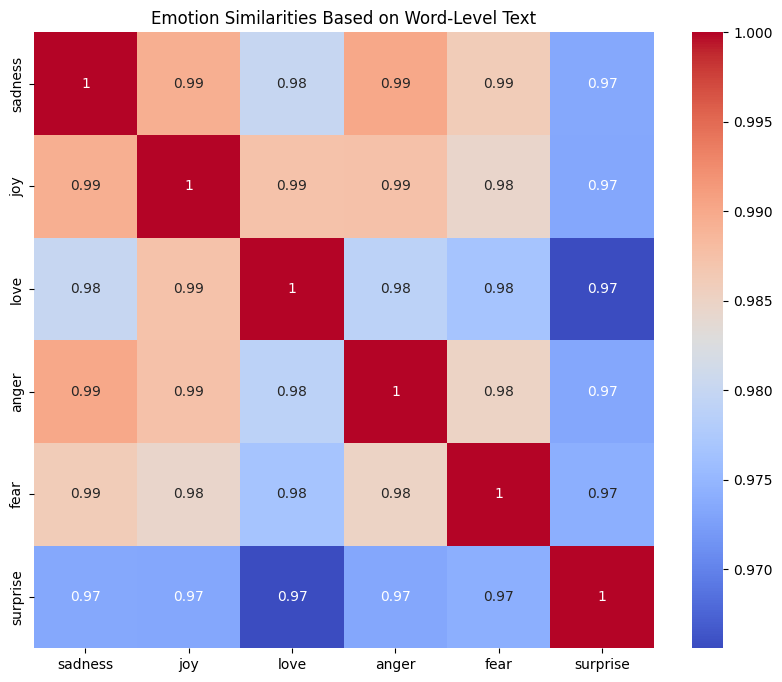

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# 데이터셋 불러오기
emotion_dataset = load_dataset("dair-ai/emotion")
df = pd.DataFrame(emotion_dataset['train'])

# 감정 라벨
emotion_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

# 감정별 텍스트 결합
emotion_texts = {emotion: ' '.join(df[df['label'] == i]['text']) for i, emotion in enumerate(emotion_labels)}

# TF-IDF 벡터화 (단어 단위)
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())
X = vectorizer.fit_transform(emotion_texts.values())

# 코사인 유사도 계산
cosine_similarities = cosine_similarity(X)

# 유사도 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarities, xticklabels=emotion_labels, yticklabels=emotion_labels, annot=True, cmap='coolwarm')
plt.title('Emotion Similarities Based on Word-Level Text')
plt.show()



In [8]:
!pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB 1.9 MB/s eta 0:00:13
   ---------------------------------------- 0.2/24.0 MB 2.4 MB/s eta 0:00:11
    --------------------------------------- 0.5/24.0 MB 3.7 MB/s eta 0:00:07
   - -------------------------------------- 1.0/24.0 MB 5.9 MB/s eta 0:00:04
   --- ------------------------------------ 2.0/24.0 MB 8.9 MB/s eta 0:00:03
   ---- ----------------------------------- 2.8/24.0 MB 10.6 MB/s eta 0:00:02
   ------ --------------------------------- 3.7/24.0 MB 11.8 MB/s eta 0:00:02
   ------- -------------------------------- 4.6/24.0 MB 12.9 MB/s eta 0:00:02
   --------- ------------------------------ 5.9/24.0 MB 14.5 MB/s eta 0:00:02
   ----------- ---------------------------- 7.1/24.0 MB 15.6 MB/s eta 0:00:02
   ------------- -------------------------- 8.1/24.0 MB 16.7 MB/s eta 0:00:01
   --------------- ------------------------ 9.3/24.0 MB 17.5 MB/s eta 0:00:01

c:\Python311\Lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


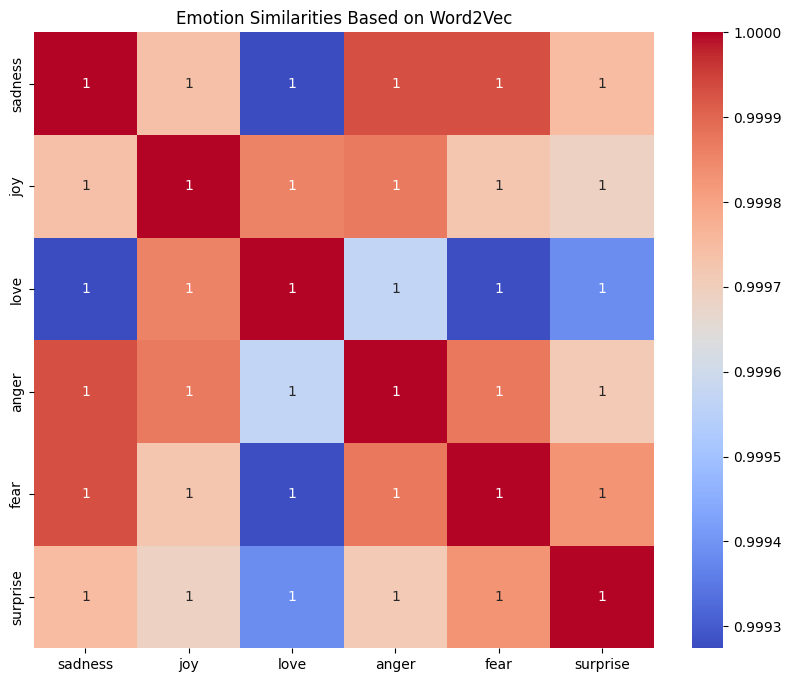

In [27]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# 데이터셋 불러오기
emotion_dataset = load_dataset("dair-ai/emotion")
df = pd.DataFrame(emotion_dataset['train'])

# 감정 라벨
emotion_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

# 텍스트를 단어 단위로 토큰화
df['tokenized_text'] = df['text'].apply(word_tokenize)

# Word2Vec 모델 학습
model = Word2Vec(sentences=df['tokenized_text'], vector_size=100, window=5, min_count=1, workers=4)

# 감정별 텍스트 결합 및 벡터 평균 계산
def get_mean_vector(tokens):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

emotion_vectors = {emotion: get_mean_vector(sum(df[df['label'] == i]['tokenized_text'].tolist(), [])) for i, emotion in enumerate(emotion_labels)}

# 코사인 유사도 계산
emotion_matrix = np.array(list(emotion_vectors.values()))
cosine_similarities = cosine_similarity(emotion_matrix)

# 유사도 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarities, xticklabels=emotion_labels, yticklabels=emotion_labels, annot=True, cmap='coolwarm')
plt.title('Emotion Similarities Based on Word2Vec')
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\장건호\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\장건호\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Python311\Lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Train set size: 16000
Validation set size: 2000
Test set size: 2000


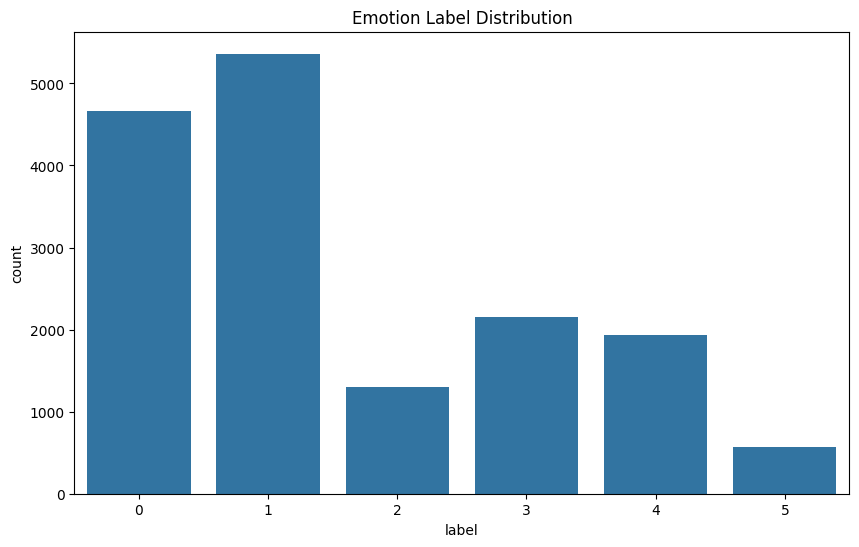

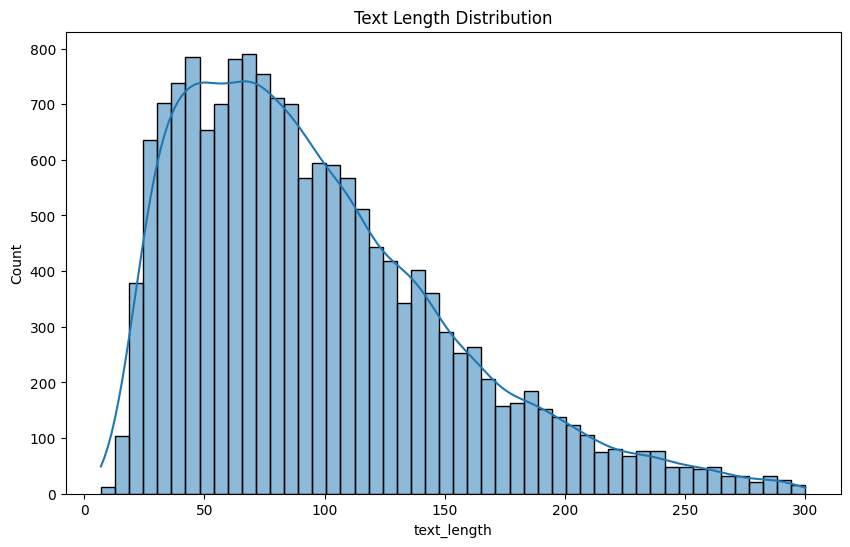

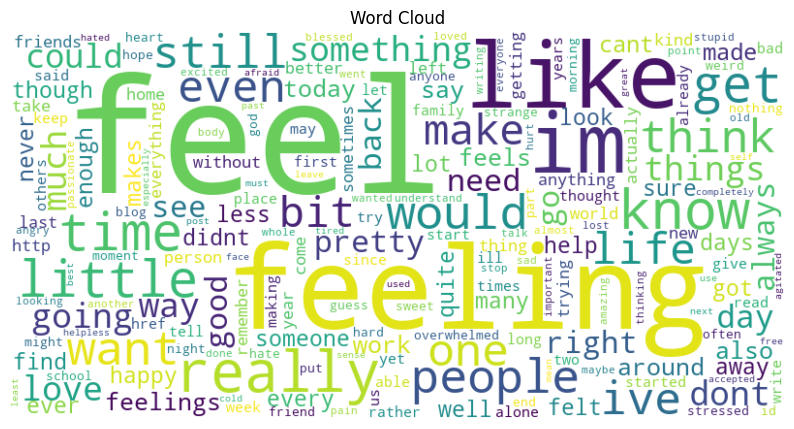

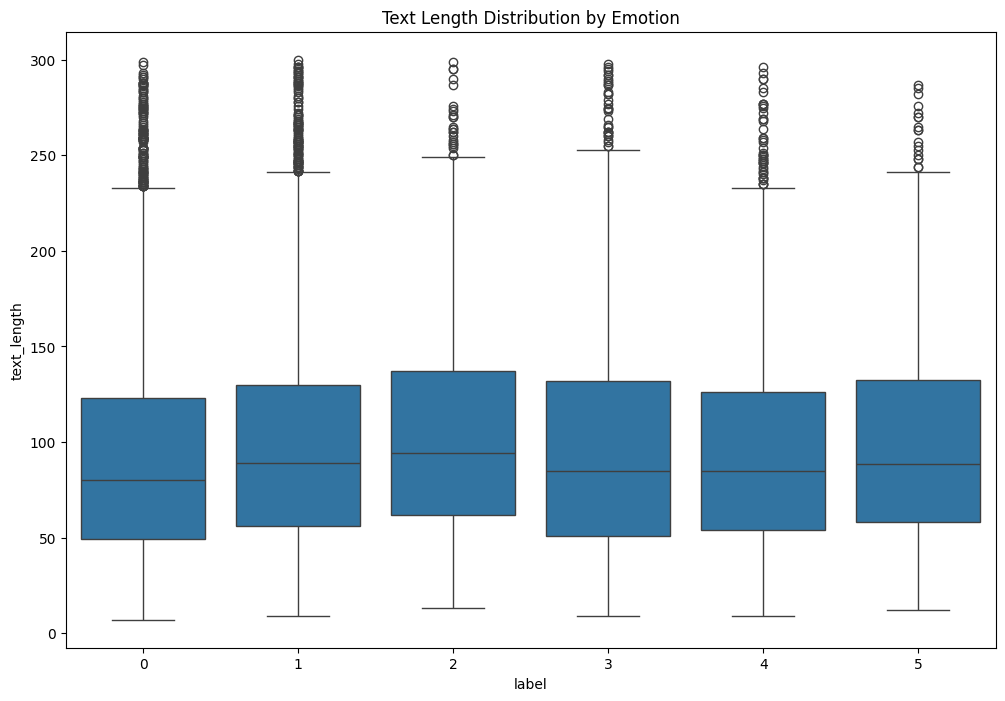

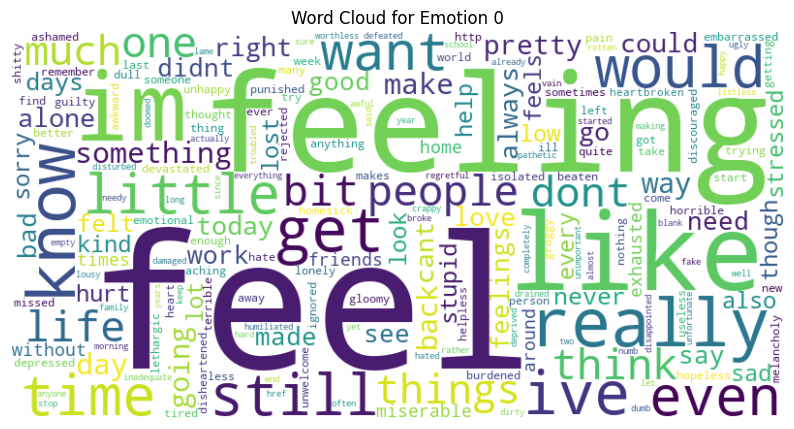

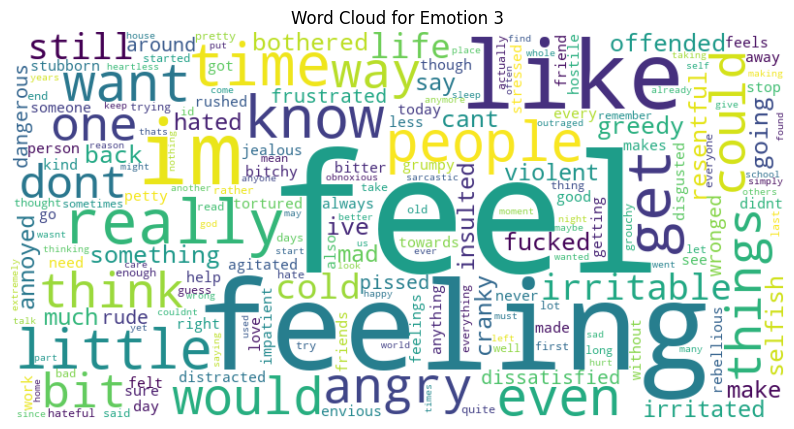

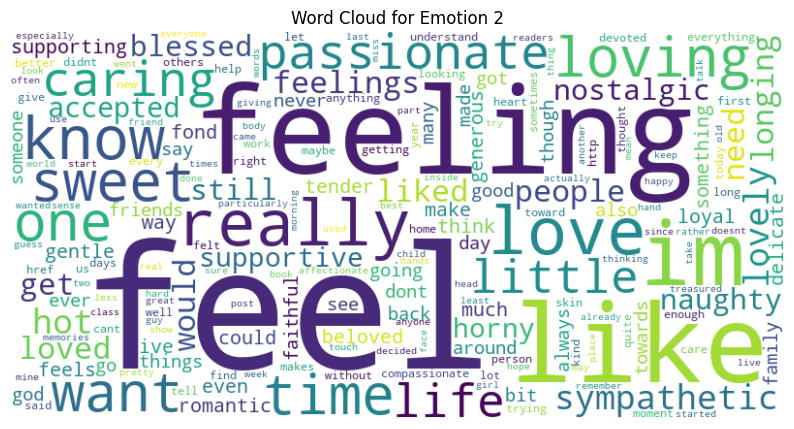

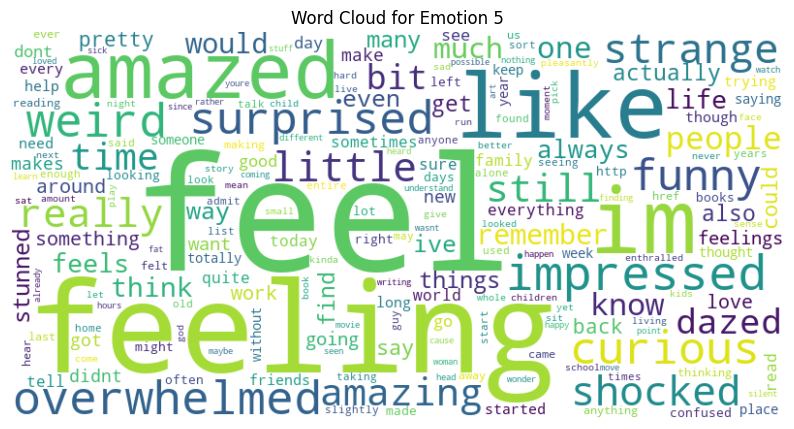

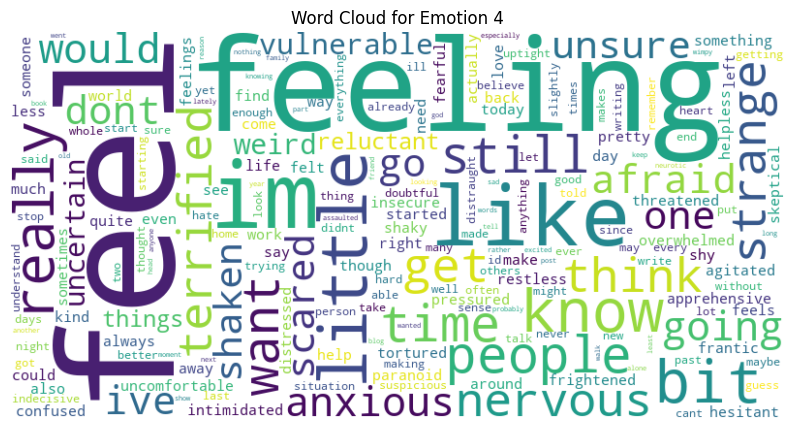

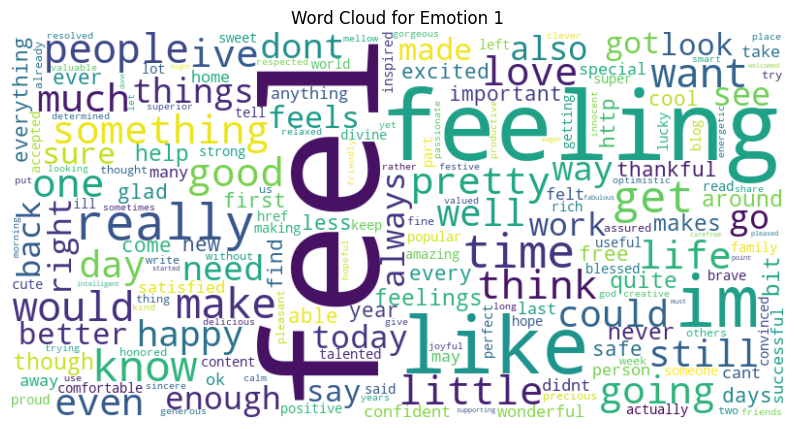

NameError: name 'combinations' is not defined

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('stopwords')

# 데이터셋 로드
dataset = load_dataset("dair-ai/emotion")
df_train = pd.DataFrame(dataset['train'])
df_validation = pd.DataFrame(dataset['validation'])
df_test = pd.DataFrame(dataset['test'])

# 데이터셋 개요
print("Train set size:", len(df_train))
print("Validation set size:", len(df_validation))
print("Test set size:", len(df_test))

# 감정 라벨 분포
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='label')
plt.title("Emotion Label Distribution")
plt.show()

# 텍스트 길이 분포
df_train['text_length'] = df_train['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df_train['text_length'], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.show()

# 단어 빈도 분석
stop_words = set(stopwords.words('english'))
df_train['tokens'] = df_train['text'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])
all_words = [word for tokens in df_train['tokens'] for word in tokens]
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# 워드 클라우드
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.show()

# 감정별 텍스트 특징
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train, x='label', y='text_length')
plt.title("Text Length Distribution by Emotion")
plt.show()

# 감정별 자주 등장하는 단어
for label in df_train['label'].unique():
    subset = df_train[df_train['label'] == label]
    words = [word for tokens in subset['tokens'] for word in tokens]
    word_freq = Counter(words)
    common_words = word_freq.most_common(20)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Emotion {label}")
    plt.show()

# 감정 라벨 간의 상관관계
emotion_labels = ['sadness', 'joy', 'anger', 'fear', 'love', 'surprise']
df_train['emotion'] = df_train['label'].apply(lambda x: emotion_labels[x])

# 감정별 상관관계 매트릭스 생성
co_occurrence_matrix = pd.DataFrame(0, index=emotion_labels, columns=emotion_labels)

for idx, row in df_train.iterrows():
    emotions = row['emotion']
    for combo in combinations(emotions, 2):
        co_occurrence_matrix.loc[combo[0], combo[1]] += 1
        co_occurrence_matrix.loc[combo[1], combo[0]] += 1

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='YlGnBu')
plt.title('Emotion Co-occurrence Heatmap')
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\장건호\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\장건호\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Python311\Lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Train set size: 16000
Validation set size: 2000
Test set size: 2000


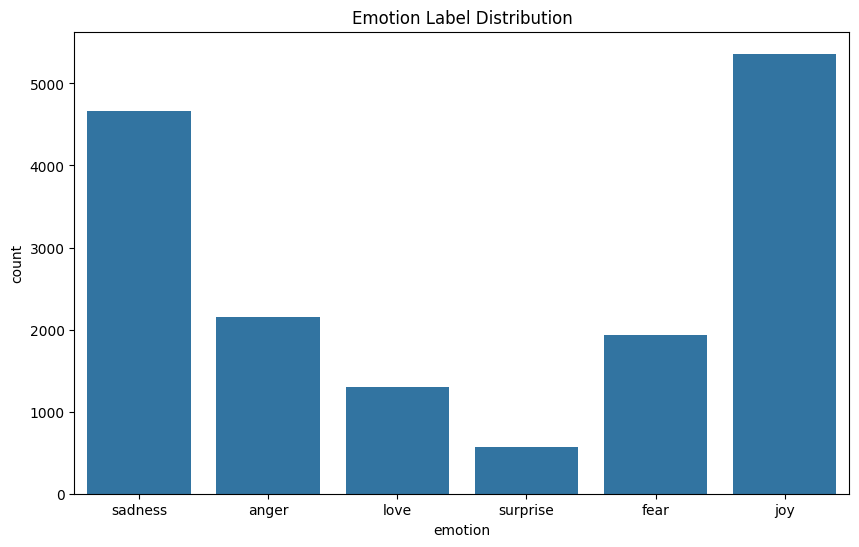

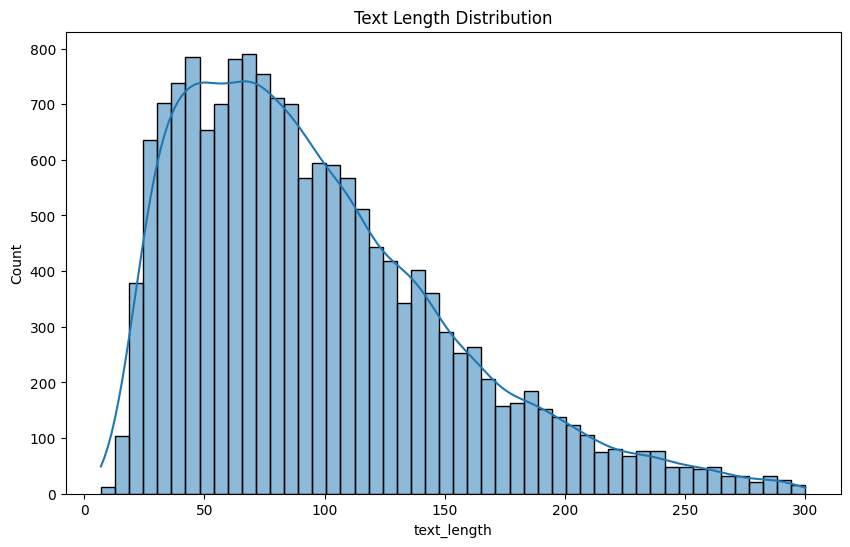

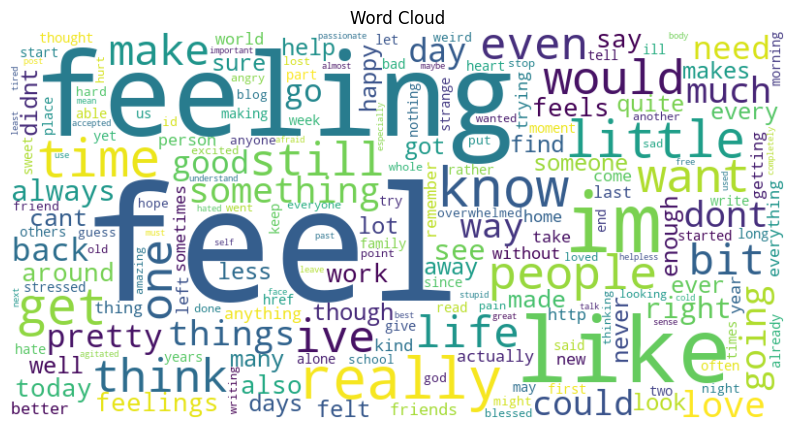

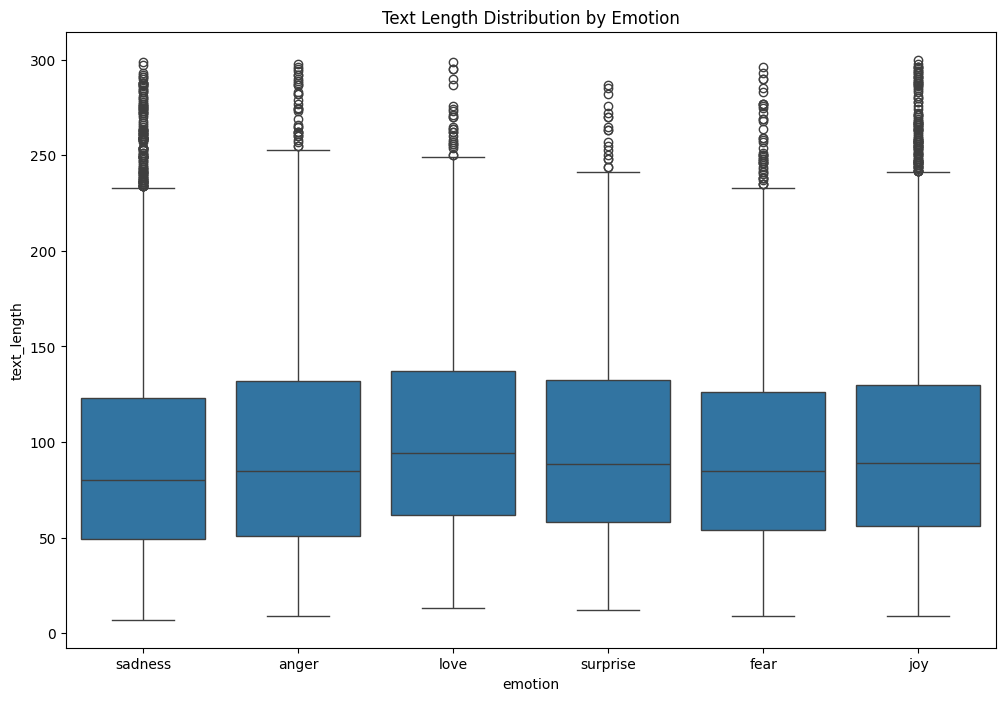

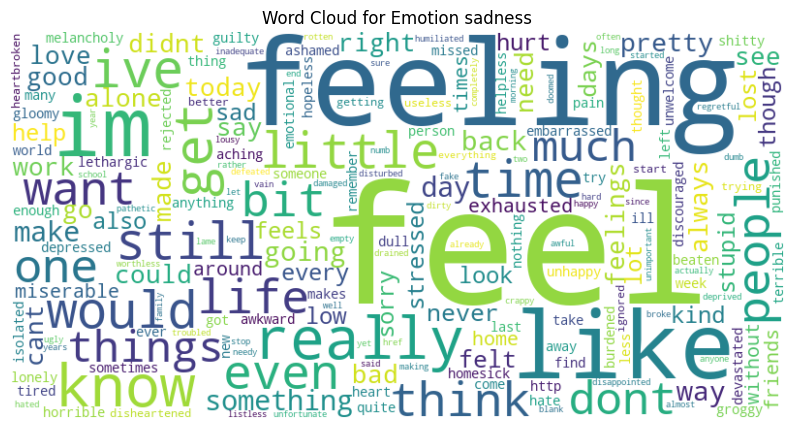

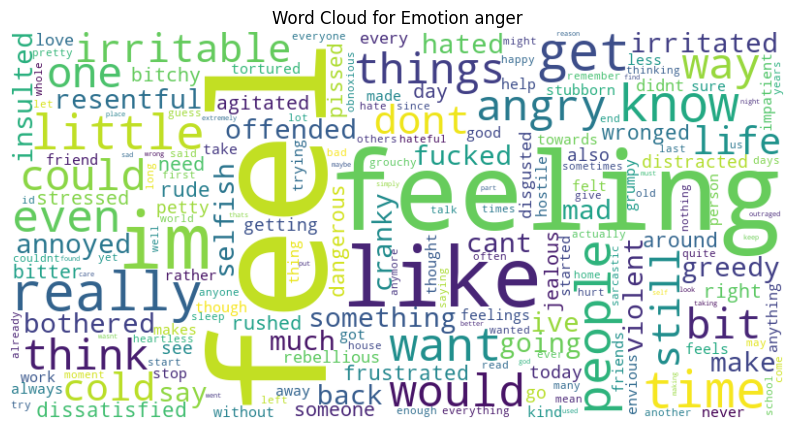

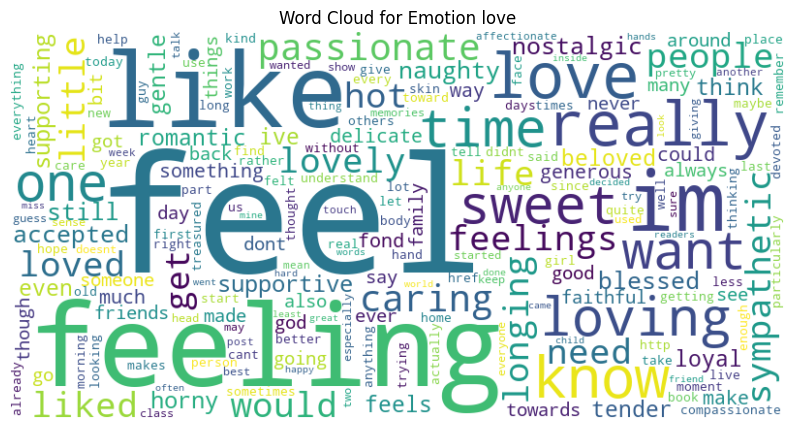

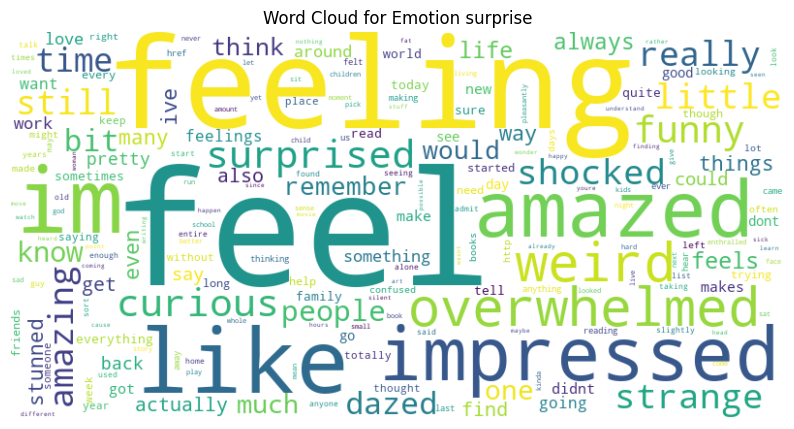

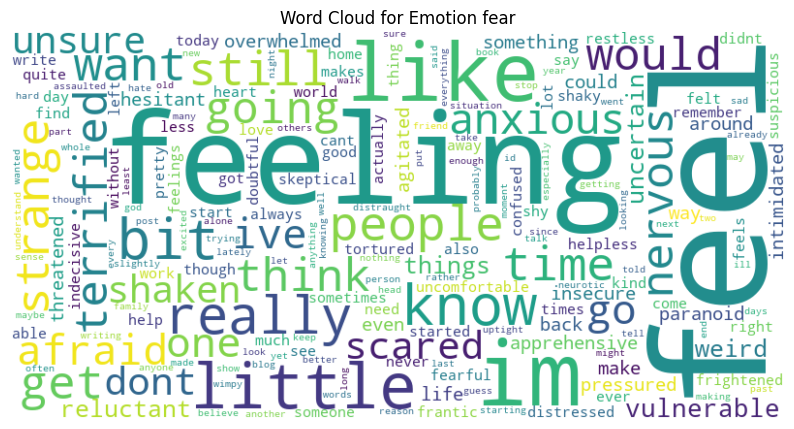

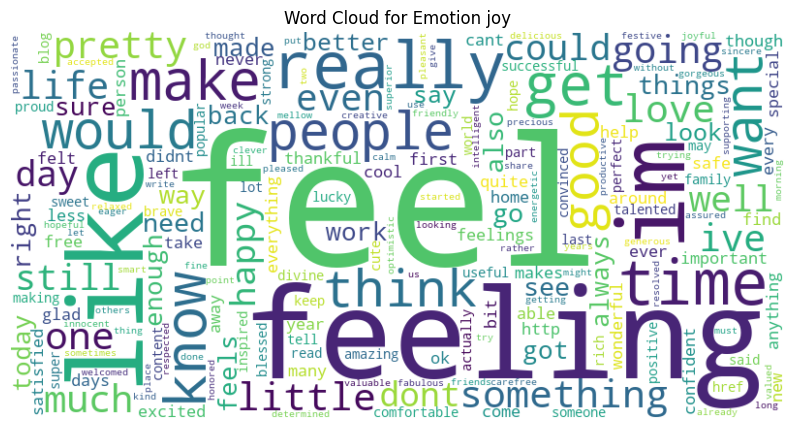

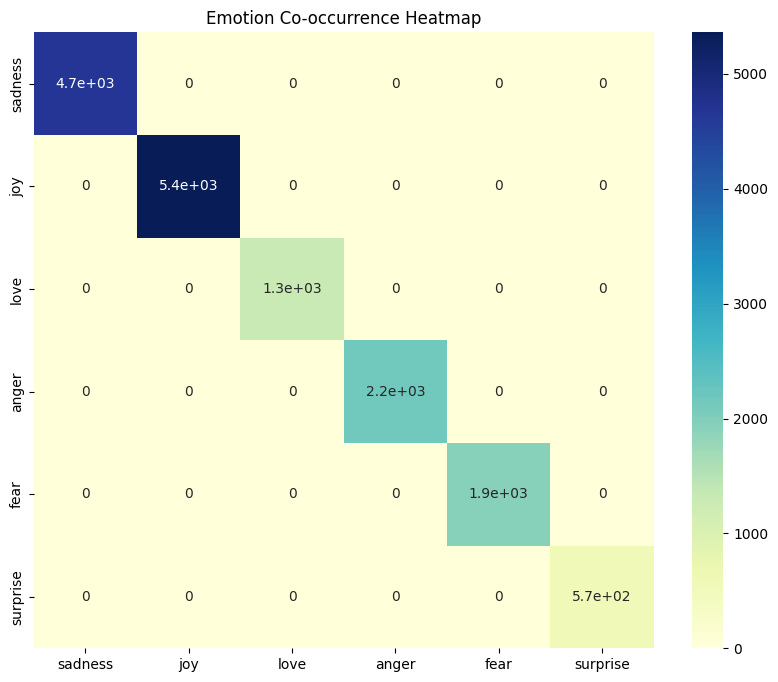

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from itertools import combinations

# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('stopwords')

# 데이터셋 로드
dataset = load_dataset("dair-ai/emotion")
df_train = pd.DataFrame(dataset['train'])
df_validation = pd.DataFrame(dataset['validation'])
df_test = pd.DataFrame(dataset['test'])

# 감정 라벨 정의
emotion_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
df_train['emotion'] = df_train['label'].apply(lambda x: emotion_labels[x])
df_validation['emotion'] = df_validation['label'].apply(lambda x: emotion_labels[x])
df_test['emotion'] = df_test['label'].apply(lambda x: emotion_labels[x])

# 데이터셋 개요
print("Train set size:", len(df_train))
print("Validation set size:", len(df_validation))
print("Test set size:", len(df_test))

# 감정 라벨 분포
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='emotion')
plt.title("Emotion Label Distribution")
plt.show()

# 텍스트 길이 분포
df_train['text_length'] = df_train['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df_train['text_length'], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.show()

# 단어 빈도 분석
stop_words = set(stopwords.words('english'))
df_train['tokens'] = df_train['text'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])
all_words = [word for tokens in df_train['tokens'] for word in tokens]
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# 워드 클라우드
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.show()

# 감정별 텍스트 특징
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train, x='emotion', y='text_length')
plt.title("Text Length Distribution by Emotion")
plt.show()

# 감정별 자주 등장하는 단어
for label in df_train['emotion'].unique():
    subset = df_train[df_train['emotion'] == label]
    words = [word for tokens in subset['tokens'] for word in tokens]
    word_freq = Counter(words)
    common_words = word_freq.most_common(20)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Emotion {label}")
    plt.show()

# 감정 라벨 간의 상관관계
# 감정별 상관관계 매트릭스 생성
co_occurrence_matrix = pd.DataFrame(0, index=emotion_labels, columns=emotion_labels)

for idx, row in df_train.iterrows():
    emotions = [row['emotion']]
    for combo in combinations(emotions, 1):
        co_occurrence_matrix.loc[combo[0], combo[0]] += 1

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='YlGnBu')
plt.title('Emotion Co-occurrence Heatmap')
plt.show()


In [2]:
!pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 300.2/300.2 kB 6.2 MB/s eta 0:00:00
